<a href="https://colab.research.google.com/github/4gzjw4dq7h-coder/SDRIS_Axioms2a1/blob/main/GenesisEmergence_Time_Space_VacuumSound.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<>:194: SyntaxWarning: invalid escape sequence '\l'
<>:205: SyntaxWarning: invalid escape sequence '\g'
<>:194: SyntaxWarning: invalid escape sequence '\l'
<>:205: SyntaxWarning: invalid escape sequence '\g'
/tmp/ipython-input-4178384006.py:194: SyntaxWarning: invalid escape sequence '\l'
  axs[0,1].set_xlabel("Dimension N"); axs[0,1].set_ylabel("Tension $\lambda$")
/tmp/ipython-input-4178384006.py:205: SyntaxWarning: invalid escape sequence '\g'
  axs[1,1].plot(t_e, n_e, '^-', color='red', label='Hawking Decay ($\gamma \propto |\lambda|$)')


Starte SDRIS Framework (Unified Simulation)...
- Axiom I: Simuliere Geometrie...
- Axiom II: Berechne Sättigung...
- Axiom III: Synthetisiere Rauschen...
- Axiom IV: Simuliere Hawking-Entropie...
Fertig! Unified Dashboard generiert.


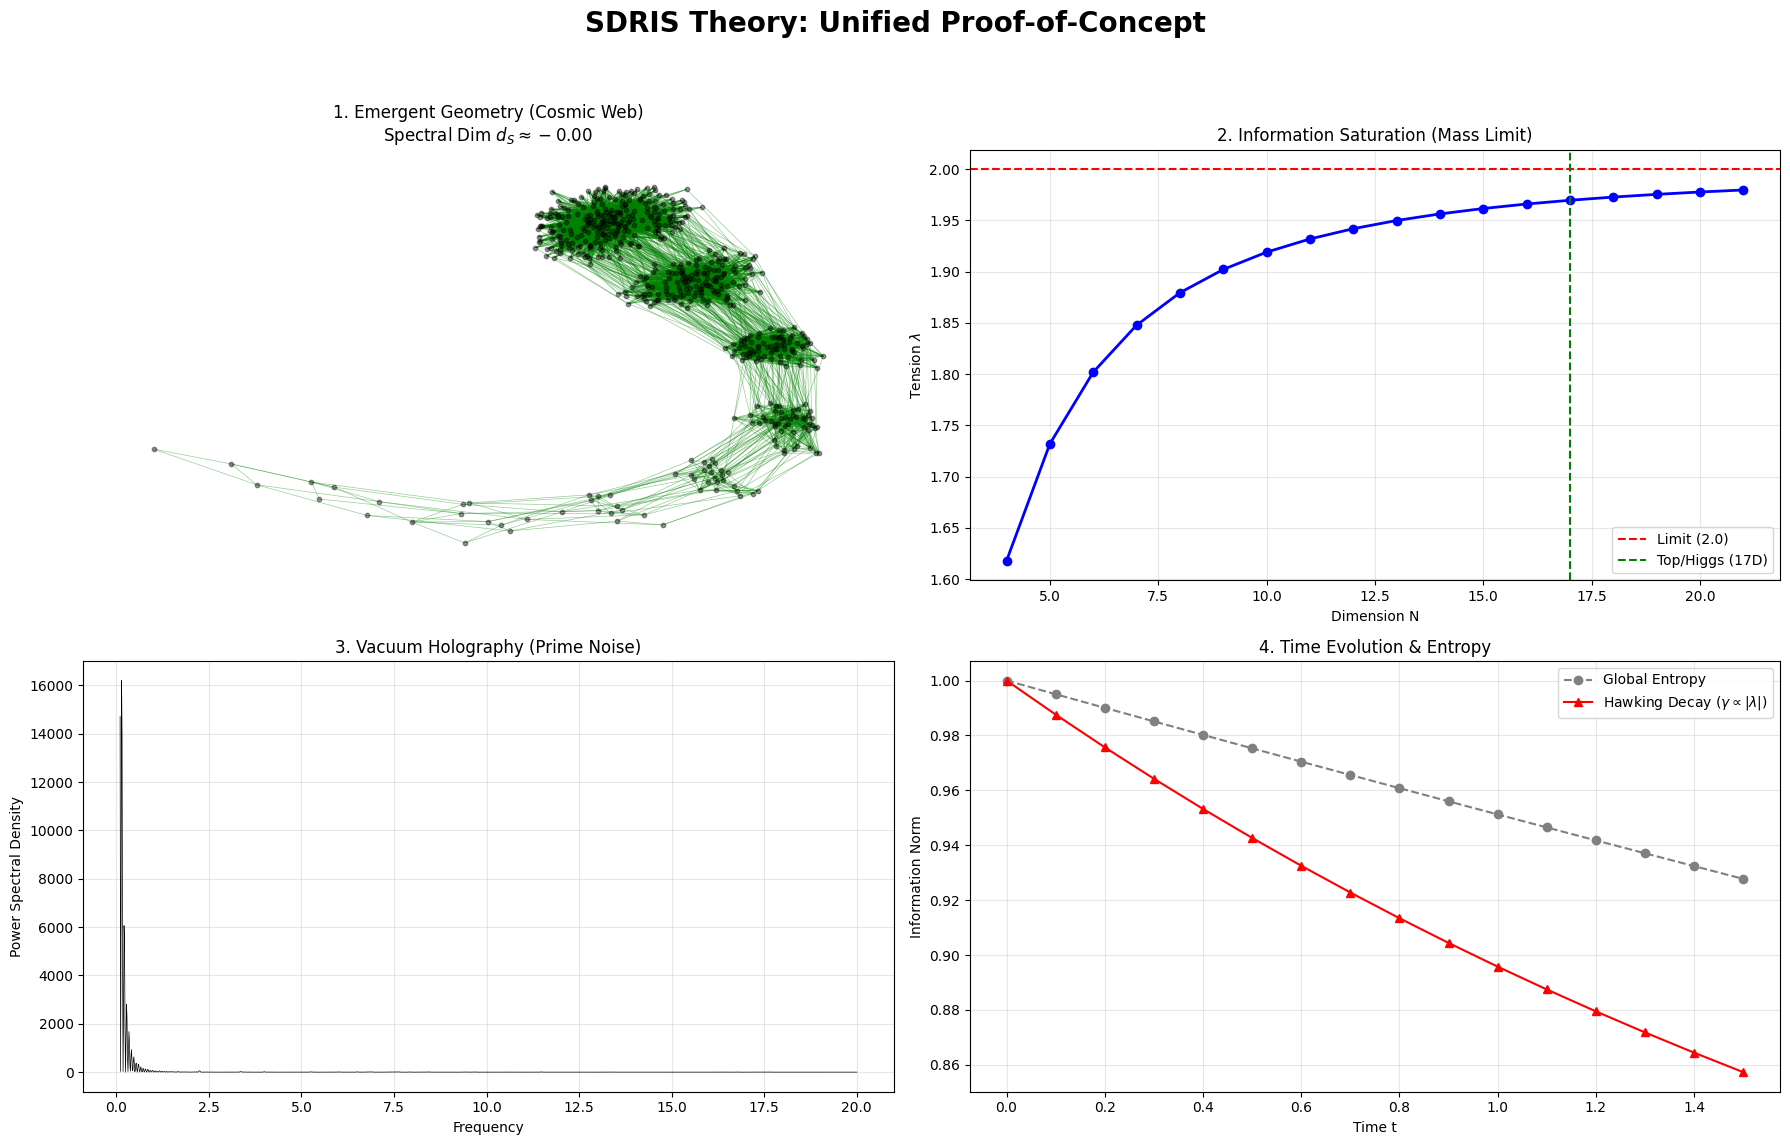

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1]:
import networkx as nx
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigvals, expm
import pandas as pd

try:
    from google.colab import files
except ImportError:
    pass

# ==========================================
# TEIL 1: GENESIS (Das wachsende Universum)
# ==========================================
class SDRIS_Universe:
    def __init__(self, p=2, p_fork=0.90, p_link=0.15):
        self.graph = nx.Graph()
        self.root_id = "0"
        self.graph.add_node(self.root_id, depth=0, active=True)
        self.active_nodes = [self.root_id]
        self.p = p
        self.p_fork = p_fork
        self.p_link = p_link
        self.time_step = 0

    def get_padic_distance(self, node1, node2):
        try:
            lca = nx.lowest_common_ancestor(self.graph, node1, node2)
            depth_lca = len(lca) if lca else 0
            return self.p ** (-depth_lca)
        except:
            return 1.0

    def step(self):
        self.time_step += 1
        new_nodes = []
        for node in self.active_nodes:
            if random.random() < self.p_fork:
                for i in range(self.p):
                    child_id = f"{node}.{i}"
                    self.graph.add_node(child_id, depth=self.time_step, active=True)
                    self.graph.add_edge(node, child_id, type='recursive')
                    new_nodes.append(child_id)
                self.graph.nodes[node]['active'] = False

        potential_neighbors = new_nodes
        if len(new_nodes) > 80: potential_neighbors = random.sample(new_nodes, 80)

        for n1 in new_nodes:
            for n2 in potential_neighbors:
                if n1 == n2: continue
                dist = self.get_padic_distance(n1, n2)
                if random.random() < (self.p_link / (dist + 1e-9)):
                    self.graph.add_edge(n1, n2, type='entanglement')
        if new_nodes: self.active_nodes = new_nodes

    def measure_spectral_dimension(self, walkers=30, t_max=30):
        if self.graph.number_of_nodes() < 50: return 0
        nodes = list(self.graph.nodes())
        return_counts = np.zeros(t_max)
        for _ in range(walkers):
            curr = random.choice(nodes)
            start = curr
            for t in range(1, t_max):
                nbrs = list(self.graph.neighbors(curr))
                if not nbrs: break
                curr = random.choice(nbrs)
                if curr == start: return_counts[t] += 1
        probs = return_counts / walkers
        probs[probs == 0] = 1e-10
        t_vals = np.arange(5, t_max)
        p_vals = probs[5:]
        if len(p_vals) > 0:
            slope, _ = np.polyfit(np.log(t_vals), np.log(p_vals), 1)
            return -2 * slope
        return 0

# ==========================================
# TEIL 2: MATRIX SOLVER (Sättigung)
# ==========================================
def run_matrix_saturation(max_dim=21):
    dims = []
    max_eigs = []
    for d in range(4, max_dim + 1):
        mat = np.zeros((d, d), dtype=complex)
        for k in range(d - 1):
            mat[k, k+1] = 1j
            mat[k+1, k] = -1j
        eigs = eigvals(mat)
        max_lambda = np.max(np.abs(eigs))
        dims.append(d)
        max_eigs.append(max_lambda)
    return dims, max_eigs

# ==========================================
# TEIL 3: PRIME NOISE (Holographie)
# ==========================================
def generate_vacuum_noise(f_max=20, num_primes=400):
    limit = int(num_primes * 15)
    is_prime = [True] * limit
    primes = []
    for p in range(2, limit):
        if is_prime[p]:
            primes.append(p)
            for i in range(p*p, limit, p): is_prime[i] = False
            if len(primes) >= num_primes: break
    freqs = np.linspace(0.1, f_max, 1500)
    psd = []
    for f in freqs:
        amp = 0
        for p in primes:
            term = (np.log(p) / np.sqrt(p)) * np.cos(2 * np.pi * f * np.log(p))
            amp += term
        psd.append((1/f) * (amp**2))
    return freqs, psd

# ==========================================
# TEIL 4: DYNAMICS (Entropie & Hawking)
# ==========================================
class SDRIS_Dynamics:
    def __init__(self, n=7):
        self.n = n
        self.J = np.zeros((n, n), dtype=complex)
        for i in range(n-1):
            self.J[i, i+1] = -1j
            self.J[i+1, i] = 1j
        self.evals, self.evecs = np.linalg.eigh(self.J)
        idx = np.argsort(np.abs(self.evals))
        self.evals = self.evals[idx]
        self.evecs = self.evecs[:, idx]

    def simulate_entropy(self, steps=15, dt=0.1, mode='constant', base_gamma=0.05):
        np.random.seed(42)
        v = np.random.rand(self.n) + 1j * np.random.rand(self.n)
        v = v / np.linalg.norm(v)
        norms = [1.0]
        times = [0.0]
        U = expm(-1j * self.J * dt)
        current_v = v.copy()

        for t in range(1, steps + 1):
            current_v = U @ current_v
            if mode == 'constant':
                current_v *= np.exp(-base_gamma * dt)
            elif mode == 'eigen':
                coeffs = self.evecs.conj().T @ current_v
                decay = np.exp(-base_gamma * np.abs(self.evals) * dt)
                current_v = self.evecs @ (coeffs * decay)
            norms.append(np.linalg.norm(current_v))
            times.append(t * dt)
        return times, norms

# ==========================================
# MAIN: Das Grand Unified Dashboard
# ==========================================
if __name__ == "__main__":
    print("Starte SDRIS Framework (Unified Simulation)...")

    # 1. Genesis
    print("- Axiom I: Simuliere Geometrie...")
    uni = SDRIS_Universe()
    for _ in range(9): uni.step()
    ds = uni.measure_spectral_dimension()

    # 2. Saturation
    print("- Axiom II: Berechne Sättigung...")
    dims, lambdas = run_matrix_saturation()

    # 3. Holography
    print("- Axiom III: Synthetisiere Rauschen...")
    freqs, noise = generate_vacuum_noise()

    # 4. Dynamics
    print("- Axiom IV: Simuliere Hawking-Entropie...")
    dyn = SDRIS_Dynamics(n=7)
    t_c, n_c = dyn.simulate_entropy(mode='constant')
    t_e, n_e = dyn.simulate_entropy(mode='eigen', base_gamma=0.2)

    # --- PLOTTING (2x2 Grid) ---
    fig, axs = plt.subplots(2, 2, figsize=(18, 12))
    plt.suptitle("SDRIS Theory: Unified Proof-of-Concept", fontsize=20, fontweight='bold')

    # Top Left: Geometry
    pos = nx.spring_layout(uni.graph, seed=42, iterations=30)
    nx.draw(uni.graph, pos, ax=axs[0,0], node_size=10, node_color='black', edge_color='green', alpha=0.4, width=0.5)
    axs[0,0].set_title(f"1. Emergent Geometry (Cosmic Web)\nSpectral Dim $d_S \\approx {ds:.2f}$")

    # Top Right: Saturation
    axs[0,1].plot(dims, lambdas, 'o-', color='blue', lw=2)
    axs[0,1].axhline(2.0, color='red', linestyle='--', label='Limit (2.0)')
    axs[0,1].axvline(17, color='green', linestyle='--', label='Top/Higgs (17D)')
    axs[0,1].set_title("2. Information Saturation (Mass Limit)")
    axs[0,1].set_xlabel("Dimension N"); axs[0,1].set_ylabel("Tension $\lambda$")
    axs[0,1].legend(); axs[0,1].grid(True, alpha=0.3)

    # Bottom Left: Noise
    axs[1,0].plot(freqs, noise, color='black', lw=0.5)
    axs[1,0].set_title("3. Vacuum Holography (Prime Noise)")
    axs[1,0].set_xlabel("Frequency"); axs[1,0].set_ylabel("Power Spectral Density")
    axs[1,0].grid(True, alpha=0.3)

    # Bottom Right: Dynamics
    axs[1,1].plot(t_c, n_c, 'o--', color='gray', label='Global Entropy')
    axs[1,1].plot(t_e, n_e, '^-', color='red', label='Hawking Decay ($\gamma \propto |\lambda|$)')
    axs[1,1].set_title("4. Time Evolution & Entropy")
    axs[1,1].set_xlabel("Time t"); axs[1,1].set_ylabel("Information Norm")
    axs[1,1].legend(); axs[1,1].grid(True, alpha=0.3)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

    filename = "SDRIS_Unified_Theory.png"
    plt.savefig(filename, dpi=150)
    print("Fertig! Unified Dashboard generiert.")
    plt.show()

    # Automatischer Download
    try:
        files.download(filename)
    except:
        pass